## Set Up

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from itertools import combinations

starType_dict = {0: 'Brown Dwarf', 1:'Red Drawf',2:'White Drawf', 3:'Main Sequence ', 4:'Supergiant', 5:'Hypergiant'}

df = pd.read_csv('6 class csv.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


### 1. What is the most common star type in the data?


All, because each type have 40 stars

In [ ]:
numStar=240
starType_list_df = df['Star type']
StarType_counts = {}

for x in range(numStar):
    if starType_list_df[x] not in StarType_counts:
        StarType_counts[starType_list_df[x]] = 1
    else:
        StarType_counts[starType_list_df[x]] += 1
            
year_df = pd.DataFrame(StarType_counts.items(), columns=['Star Type', 'Amount of Stars']).sort_values('Star Type', ascending=False).reset_index(drop=True)
year_df

print('The most common star type is ' + starType_dict[year_df.loc[0, 'Star Type']]+ ', with amount of '+str(year_df.loc[0, 'Amount of Stars']))

### 2.What common patterns do you notice between any two properties? 
Ex: Is there a relationship between the star color and temperature? Yes

Here's a list of all the correlations (Note: my correlation threshold is 0.5)

Strong Negative correlations:

| Absolute magnitude(Mv) | Star type              |
|------------------------|------------------------|
| Temperature (K)        | Star color             |
| Luminosity(L/Lo)       | Absolute magnitude(Mv) |
| Radius(R/Ro)           | Absolute magnitude(Mv) |



Strong Positive correlations:

| Luminosity(L/Lo) | Radius(R/Ro) |
|------------------|--------------|
| Radius(R/Ro)     | Star type    |
| Luminosity(L/Lo) | Star type    |


If we treat the columns as their index number, then correlation doesn't matter with directions, so we want combinations of indexes, not permutation. We need to generate every combinations of columns names without repeats or columns.

Another obstacle is that 2 of the categories, is string and not a number. So to fix that, we assign each option a number. 


In [4]:
dfCorr=df
dfCorr['Star color']=dfCorr['Star color'].astype('category').cat.codes
dfCorr['Spectral Class']=dfCorr['Spectral Class'].astype('category').cat.codes

dfCorr=dfCorr.corr(numeric_only=False)

corrList = pd.DataFrame(columns=['Row', 'Column', 'Correlation Value'])

size=0
for x in range(len(dfCorr.columns)):
    corrList.loc[size,'Row']=dfCorr.axes[1][x]
    for y in range(len(dfCorr.columns)):
        corrList.loc[size,'Row']=dfCorr.axes[1][x]
        corrList.loc[size,'Column']=dfCorr.axes[0][y]
        corrList.loc[size,'Correlation Value']=dfCorr.iloc[x][y]
        size=size+1   

###########################################################3
threshold = 0.5
corrListStrong = corrList[(corrList['Correlation Value'] >= threshold) | (corrList['Correlation Value'] <= -threshold) ]

# remove Correlation Value of 1.0 because those are the column of the same thing
corrListStrong = corrListStrong.loc[corrList['Correlation Value'] != 1]


#Drop duplicate rows in Pandas based on column value
#if they have the same corr value they're the same combination of row and column
corrListStrong = corrListStrong.drop_duplicates(subset='Correlation Value', keep="first")
corrListStrong=corrListStrong.sort_values('Correlation Value')
corrListStrong['Correlation Type']=corrListStrong['Correlation Value'].apply(lambda x: 'Strong Positive' if x>0 else 'Strong Negative')

corrListStrong

,Row,Column,Correlation Value,Correlation Type
25,Absolute magnitude(Mv),Star type,-0.955276,Strong Negative
5,Temperature (K),Star color,-0.697438,Strong Negative
10,Luminosity(L/Lo),Absolute magnitude(Mv),-0.692619,Strong Negative
17,Radius(R/Ro),Absolute magnitude(Mv),-0.608728,Strong Negative
9,Luminosity(L/Lo),Radius(R/Ro),0.526516,Strong Positive
18,Radius(R/Ro),Star type,0.660975,Strong Positive
11,Luminosity(L/Lo),Star type,0.676845,Strong Positive


### 3. What properties are the most influential in classifying a star's type?

Most influencial is Absolute magnitude(Mv) with a negative correlation, followed by Luminosity(L/Lo) positive correlation, then Radius(R/Ro) positive correlation

(Note: my correlation threshold is 0.5)

| Row                    | Column    | Correlation Value | Correlation Type |
|------------------------|-----------|-------------------|------------------|
| Luminosity(L/Lo)       | Star type | 0.676845          | Strong           |
| Radius(R/Ro)           | Star type | 0.660975          | Strong           |
| Absolute magnitude(Mv) | Star type | -0.955276         | Strong           |

In [34]:
dfCorr=df
dfCorr['Star color']=dfCorr['Star color'].astype('category').cat.codes
dfCorr['Spectral Class']=dfCorr['Spectral Class'].astype('category').cat.codes

dfCorr=dfCorr.corr(numeric_only=False)

corrList = pd.DataFrame(columns=['Row', 'Column', 'Correlation Value'])

size=0
for x in range(len(dfCorr.columns)):
    corrList.loc[size,'Row']=dfCorr.axes[1][x]
    for y in range(len(dfCorr.columns)):
        corrList.loc[size,'Row']=dfCorr.axes[1][x]
        corrList.loc[size,'Column']=dfCorr.axes[0][y]
        corrList.loc[size,'Correlation Value']=dfCorr.iloc[x][y]
        size=size+1   
        
corrList = corrList.loc[corrList['Correlation Value'] != 1]
corrList = corrList.drop_duplicates(subset='Correlation Value', keep="first")

corrList

#############################################################################
threshold = 0.5

starTypeCorrelations = corrList[corrList.loc[:,'Row']=='Star type']
starTypeCorrelations=pd.concat([starTypeCorrelations, corrList[corrList.loc[:,'Column']=='Star type']])
starTypeCorrelations.sort_values('Correlation Value', ascending=False)
starTypeCorrelations['Correlation Type']=starTypeCorrelations['Correlation Value'].apply(lambda x: 'Strong' if abs(x)>threshold else 'Weak')
starTypeCorrelations.loc[starTypeCorrelations['Correlation Type'] == 'Strong']

,Row,Column,Correlation Value,Correlation Type
11,Luminosity(L/Lo),Star type,0.676845,Strong
18,Radius(R/Ro),Star type,0.660975,Strong
25,Absolute magnitude(Mv),Star type,-0.955276,Strong


### 4. Can you make a similar graph as the one shown in Kaggle to showcase the data as a Hertzsprung-Russell Diagram?

size(radius) scaling used is log scaling, because the difference in magnitude of the biggest and smallest radius is 2E5

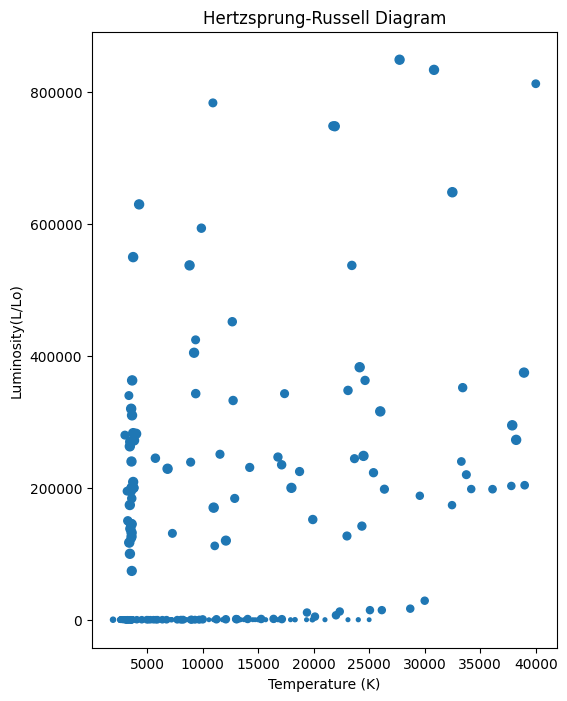

In [65]:
# x-axis is temperature
# y-axis is Luminosity
# dot size is 
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram')
#colorList
ax.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], s=df['Radius(R/Ro)'].apply(lambda x: math.log(x/0.001,1.4)) )

Since the graphs already use 3 attributes in plotting (L,K,R), I will use the other attribute (Mv,Star type,Star color,Spectral Class) to filter

#### Hertzsprung-Russell Diagram with Star Type 5

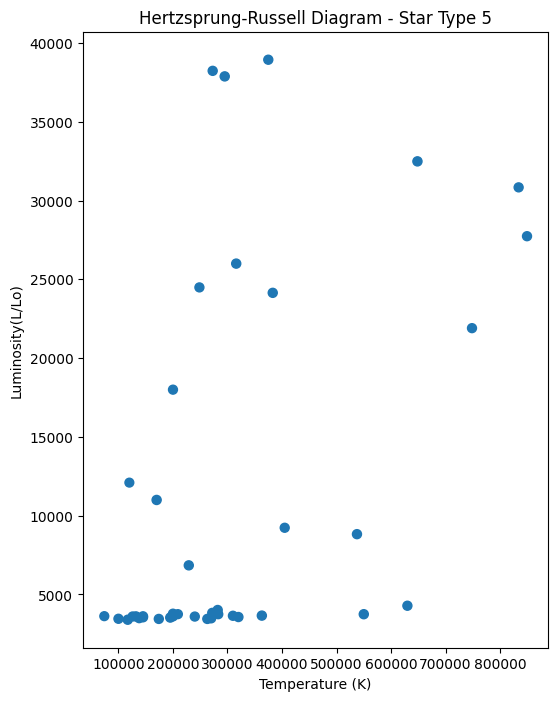

In [85]:
starTp=5

src='Star type'
LuminosityList = (df.loc[df[src]==starTp])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==starTp])['Temperature (K)']
RadiusList = (df.loc[df[src]==starTp])['Radius(R/Ro)']
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Star Type '+str(starTp))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### Hertzsprung-Russell Diagram with Spectral Class M


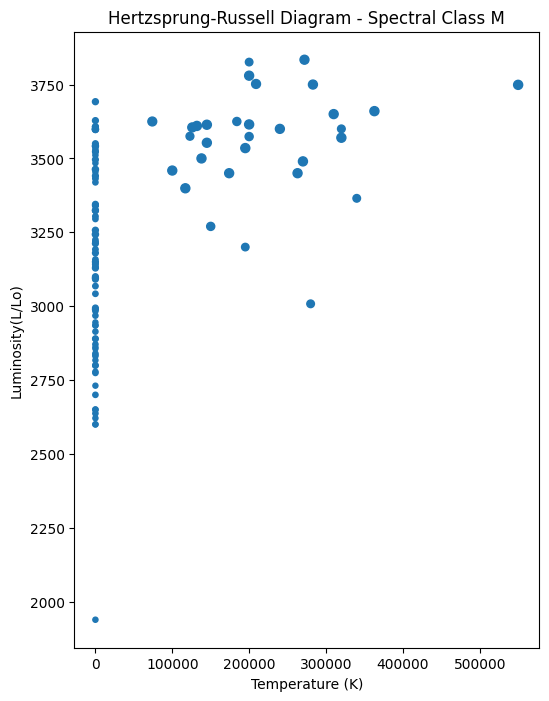

In [78]:
spectralCl='M'

src='Spectral Class'
LuminosityList = (df.loc[df[src]==spectralCl])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==spectralCl])['Temperature (K)']
RadiusList = (df.loc[df[src]==spectralCl])['Radius(R/Ro)']
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Spectral Class '+str(spectralCl))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### Hertzsprung-Russell Diagram with Star color Blue


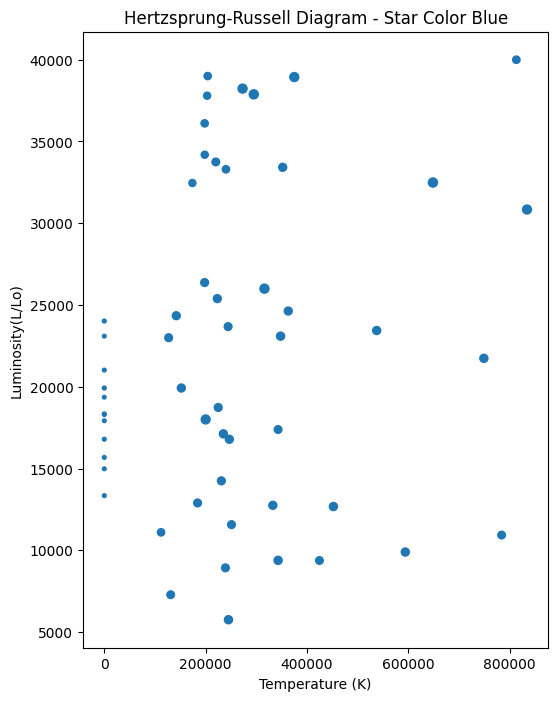

In [81]:
starClr='Blue'

src='Star color'
LuminosityList = (df.loc[df[src]==starClr])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df[src]==starClr])['Temperature (K)']
RadiusList = (df.loc[df[src]==starClr])['Radius(R/Ro)']
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' - Star Color '+str(starClr))

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )

#### Hertzsprung-Russell Diagram with Absolute magnitude(Mv) greater than 0


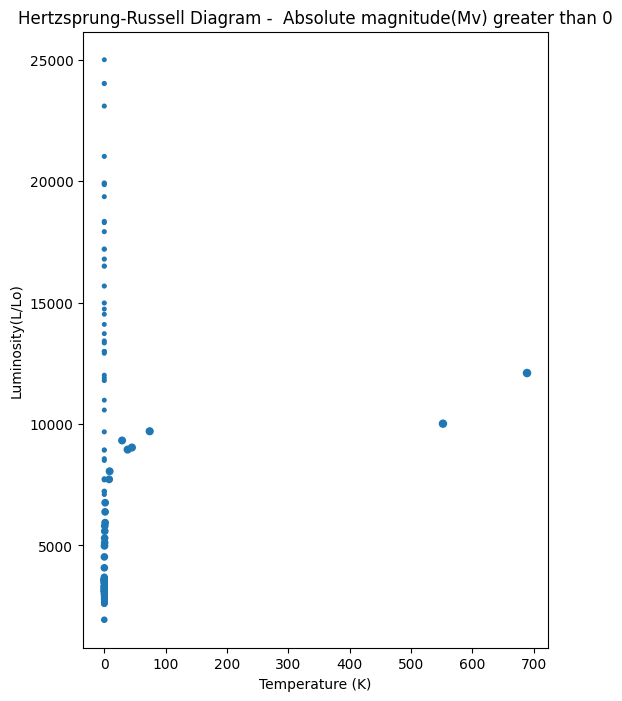

In [84]:

LuminosityList = (df.loc[df['Absolute magnitude(Mv)'] >0])['Luminosity(L/Lo)']
TemperatureList = (df.loc[df['Absolute magnitude(Mv)']>0])['Temperature (K)']
RadiusList = (df.loc[df['Absolute magnitude(Mv)']>0])['Radius(R/Ro)']
DPI = 100
width, height = 600, 800
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI))
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Hertzsprung-Russell Diagram'+' -  Absolute magnitude(Mv) greater than 0')

ax.scatter(LuminosityList, TemperatureList, s=RadiusList.apply(lambda x: math.log(x/0.001,1.4)) )